## Dataset

https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants?resource=download

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
import zipfile

zf = zipfile.ZipFile('Desktop\DS\iNeuron\\archive.zip') 
df = pd.read_csv(zf.open('zomato.csv'))

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.shape

(51717, 17)

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
df.url.duplicated().sum()

0

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.rename(columns = {"approx_cost(for two people)":"costfor2", "listed_in(city)":"city"}, inplace = True)
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'costfor2',
       'reviews_list', 'menu_item', 'listed_in(type)', 'city'],
      dtype='object')

In [9]:
df.dropna(subset = ['location', 'cuisines', 'costfor2','rest_type'], inplace=True)

In [10]:
df.drop(['url','dish_liked','phone'], axis = 1, inplace=True)

In [11]:
df.isnull().sum()

address               0
name                  0
online_order          0
book_table            0
rate               7615
votes                 0
location              0
rest_type             0
cuisines              0
costfor2              0
reviews_list          0
menu_item             0
listed_in(type)       0
city                  0
dtype: int64

In [12]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
def rate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value= str(value).split('/')  # after spliting it will be a list
        value= value[0]
        return float(value)


df.rate= df.rate.apply(rate)
df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [14]:
df.rate.isnull().sum()

9885

In [15]:
df.rate.fillna(df.rate.mean(), inplace= True)

In [16]:
df.rate.isnull().sum()

0

In [17]:
df.shape

(51148, 14)

In [18]:
nunique = df.nunique()

In [19]:
nunique

address            11394
name                8723
online_order           2
book_table             2
rate                  32
votes               2326
location              93
rest_type             93
cuisines            2704
costfor2              70
reviews_list       22324
menu_item           9063
listed_in(type)        7
city                  30
dtype: int64

In [20]:
valuecounts_location = df.location.value_counts()

In [21]:
valuecountslessthan200_location = valuecounts_location[valuecounts_location<200]

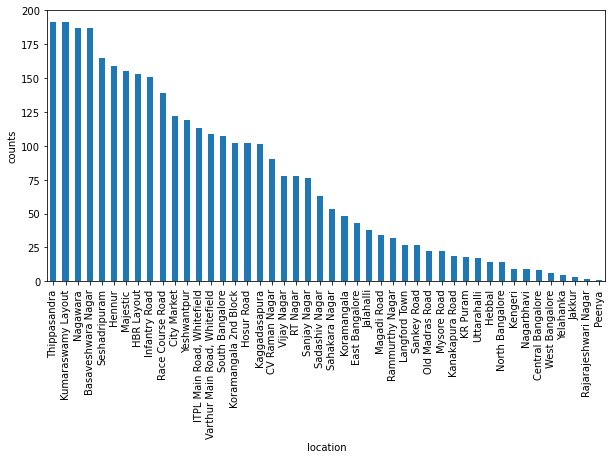

In [22]:
fig = plt.figure(figsize =(10, 5))
valuecountslessthan200_location.plot.bar()
plt.xlabel("location")
plt.ylabel("counts")
plt.show()

In [23]:
#function to remove location having count less than 200

def locn(values):
    if (values in valuecountslessthan200_location):
        return 'others'
    else:
        return values
    
df.location = df.location.apply(locn)
df.location.value_counts(ascending=False)

BTM                      5071
others                   3409
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1248
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Ulsoor                   1017
Koramangala 4th Block    1017
Banashankari              904
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
Lavelle Ro

C:\Users\arkarmak\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


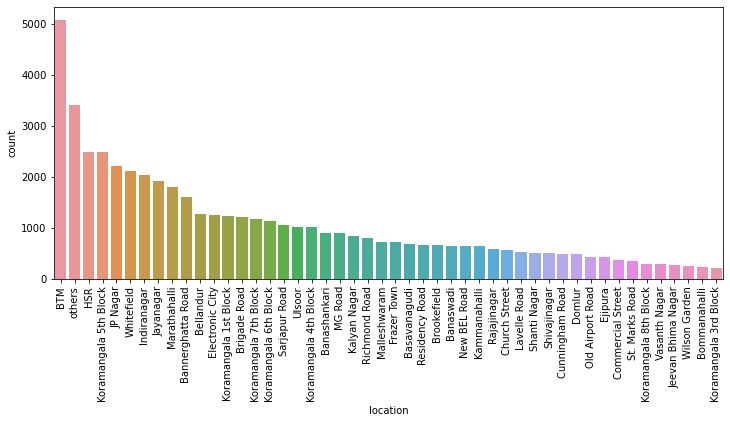

In [24]:
plt.figure(figsize= (12,5))
sns.countplot(df.location,order = df.location.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

https://www.kaggle.com/code/ujjwalkumar078/zomato-dataset

In [25]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [26]:
df['rest_type'] = df['rest_type'].str.split(',').str[0]

In [27]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk',
       'Food Truck', 'Microbrewery', 'Lounge', 'Food Court', 'Dhaba',
       'Club', 'Bhojanalya', 'Pop Up'], dtype=object)

C:\Users\arkarmak\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


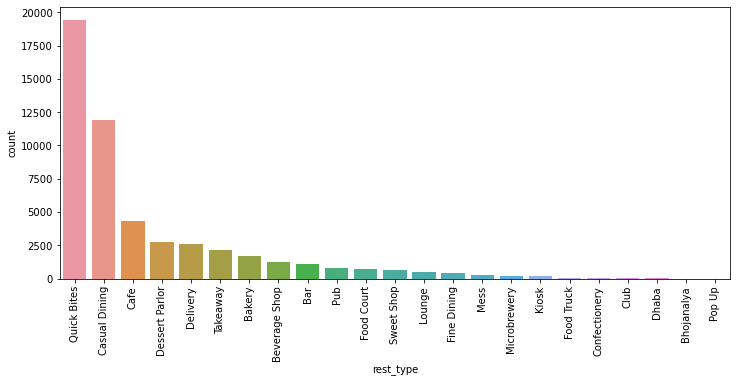

In [28]:
plt.figure(figsize= (12,5))
sns.countplot(df.rest_type,order = df.rest_type.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

C:\Users\arkarmak\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


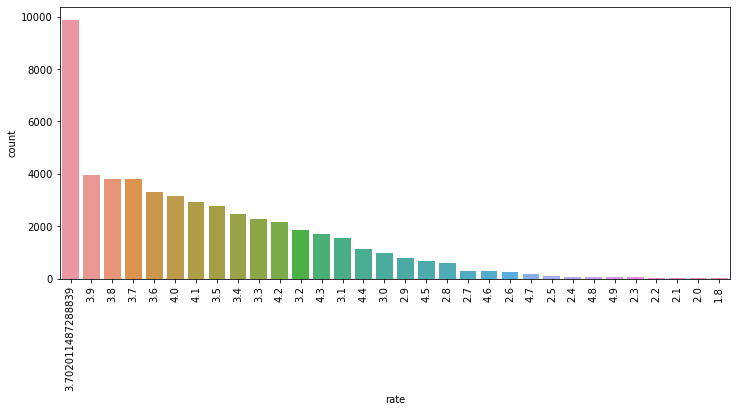

In [29]:
plt.figure(figsize= (12,5))
sns.countplot(df.rate,order = df.rate.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51148 non-null  object 
 1   name             51148 non-null  object 
 2   online_order     51148 non-null  object 
 3   book_table       51148 non-null  object 
 4   rate             51148 non-null  float64
 5   votes            51148 non-null  int64  
 6   location         51148 non-null  object 
 7   rest_type        51148 non-null  object 
 8   cuisines         51148 non-null  object 
 9   costfor2         51148 non-null  object 
 10  reviews_list     51148 non-null  object 
 11  menu_item        51148 non-null  object 
 12  listed_in(type)  51148 non-null  object 
 13  city             51148 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.9+ MB


In [31]:
df.costfor2.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [32]:
def cost(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
df['costfor2']=  df['costfor2'].apply(cost)
df['costfor2'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

C:\Users\arkarmak\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


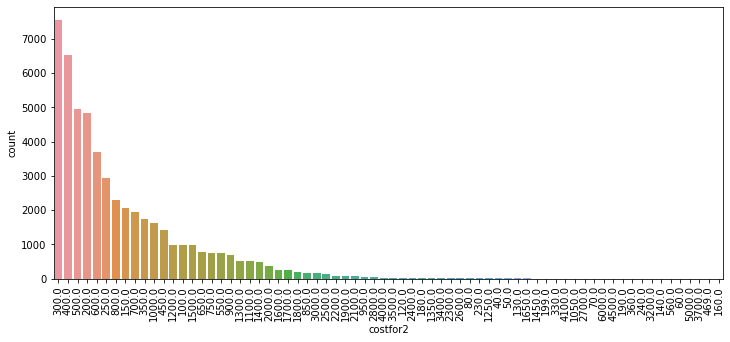

In [33]:
plt.figure(figsize= (12,5))
sns.countplot(df.costfor2,order = df.costfor2.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [34]:
df.cuisines.value_counts()

North Indian                                 2858
North Indian, Chinese                        2355
South Indian                                 1822
Biryani                                       906
Bakery, Desserts                              899
                                             ... 
Beverages, Burger                               1
North Indian, Mughlai, Lucknowi                 1
Continental, Thai, North Indian, Chinese        1
North Indian, Bengali, Chinese, Beverages       1
North Indian, Chinese, Arabian, Momos           1
Name: cuisines, Length: 2704, dtype: int64

In [35]:
def cuisines(value):
    value = str(value)
    if ',' in value:
        return "multicusine"
    else:
        return str(value)
df['cuisines']=  df['cuisines'].apply(cuisines)
df['cuisines'].unique()

array(['multicusine', 'North Indian', 'Cafe', 'Pizza', 'Biryani',
       'South Indian', 'Chinese', 'Bakery', 'Fast Food', 'Desserts',
       'Ice Cream', 'Beverages', 'Mithai', 'Andhra', 'Street Food',
       'Italian', 'Arabian', 'Vietnamese', 'Rolls', 'Juices', 'Mughlai',
       'Finger Food', 'Continental', 'Kebab', 'Maharashtrian', 'Bohri',
       'Bengali', 'Burger', 'Rajasthani', 'Healthy Food', 'Mangalorean',
       'Momos', 'BBQ', 'Seafood', 'Kerala', 'Gujarati', 'Mexican',
       'Drinks Only', 'Tea', 'Sandwich', 'Turkish', 'Modern Indian',
       'Bihari', 'Lebanese', 'American', 'Thai', 'Burmese',
       'North Eastern', 'Chettinad', 'Asian', 'Japanese', 'Spanish',
       'Tibetan', 'Oriya', 'Hyderabadi', 'Kashmiri', 'Korean', 'Assamese',
       'Belgian', 'Bar Food', 'European', 'French', 'Mediterranean'],
      dtype=object)

In [36]:
# removing those cuisines which coresponds to a value less than 200

cuisines = df.cuisines.value_counts(ascending = False)
cuisinesLessThan200 = cuisines[cuisines<200]

#function to remove

def handlecuisines(value):
    if (value in cuisinesLessThan200):
        return 'others'
    else:
        return value
df.cuisines = df.cuisines.apply(handlecuisines)
df.cuisines.value_counts()

multicusine     38918
North Indian     2858
others           1939
South Indian     1822
Biryani           906
Fast Food         798
Desserts          760
Cafe              726
Bakery            649
Chinese           554
Beverages         284
Finger Food       258
Street Food       255
Ice Cream         213
Kerala            208
Name: cuisines, dtype: int64

C:\Users\arkarmak\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


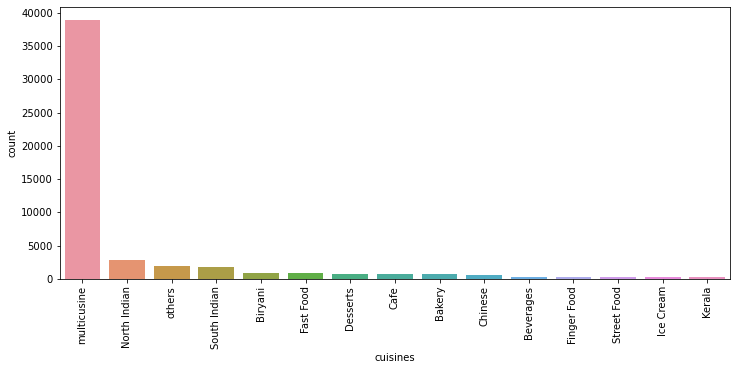

In [37]:
plt.figure(figsize= (12,5))
sns.countplot(df.cuisines,order = df.cuisines.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [38]:
df["listed_in(type)"].value_counts()

Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: listed_in(type), dtype: int64

C:\Users\arkarmak\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

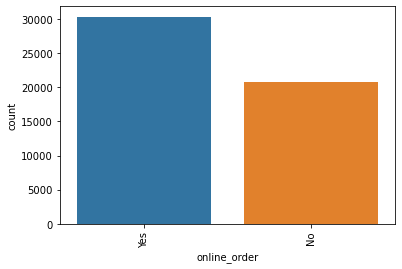

In [39]:
sns.countplot(df.online_order)
plt.xticks(rotation = 90)

In [40]:
# location-wise online facility
# we draw a pivot table

df1= df.groupby(['location', 'online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1= pd.read_csv('location_online.csv')
df1= pd.pivot_table(df1, values= None, index=['location'], columns= ['online_order'], fill_value=0, aggfunc=np.sum)
df1.head()

name      
online_order         No   Yes
location                     
BTM                1766  3305
Banashankari        397   507
Banaswadi           302   343
Bannerghatta Road   687   924
Basavanagudi        243   441

<AxesSubplot:xlabel='location'>

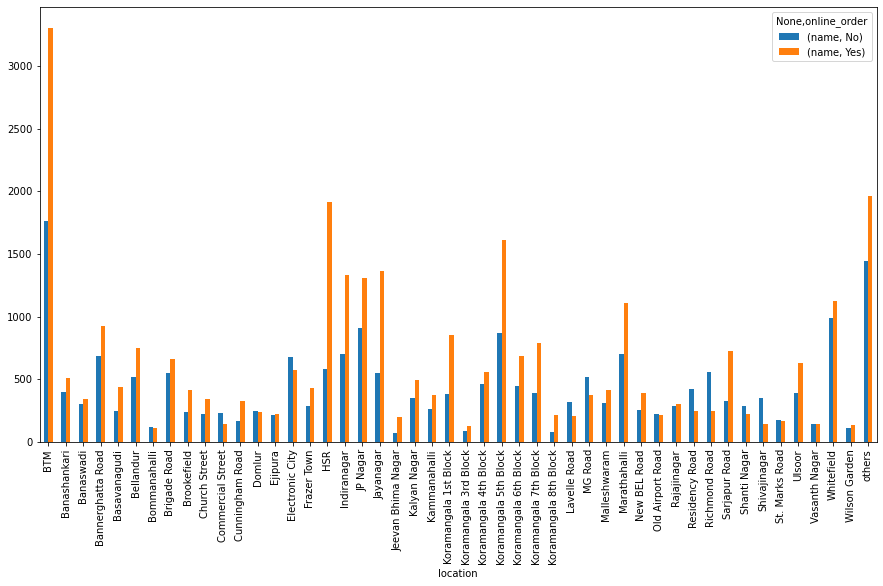

In [41]:
df1.plot(kind='bar', figsize= (15,8))

In [42]:
# location-wise book table facility
# we draw a pivot table

df2= df.groupby(['location', 'book_table'])['name'].count()
df2.to_csv('location_book_table.csv')
df2= pd.read_csv('location_book_table.csv')
df2= pd.pivot_table(df2, values= None, index=['location'], columns= ['book_table'], fill_value=0, aggfunc=np.sum)
df2.head()

name     
book_table           No  Yes
location                    
BTM                4903  168
Banashankari        840   64
Banaswadi           637    8
Bannerghatta Road  1512   99
Basavanagudi        668   16

<AxesSubplot:xlabel='location'>

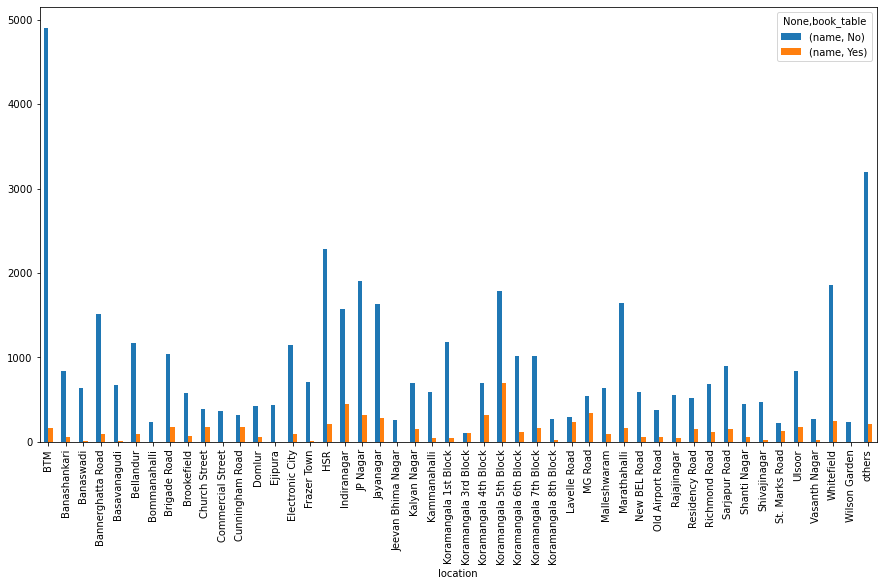

In [43]:
df2.plot(kind='bar', figsize= (15,8))

In [44]:
# location-wise rest_type facility
# we draw a pivot table

df3= df.groupby(['location', 'rest_type'])['name'].count()
df3.to_csv('location_rest_type.csv')
df3= pd.read_csv('location_rest_type.csv')
df3= pd.pivot_table(df3, values= None, index=['location'], columns= ['rest_type'], fill_value=0, aggfunc=np.sum)
df3.head()

name                                                       \
rest_type         Bakery Bar Beverage Shop Bhojanalya Cafe Casual Dining Club   
location                                                                        
BTM                   88  55           227          0  320           738    0   
Banashankari          22  27            20          0  106           155    0   
Banaswadi             28   9            11          0   50           121    0   
Bannerghatta Road     62   0            24          0  112           322    0   
Basavanagudi          41  11            10          0   42           114    0   

                                                         ...                   \
rest_type         Confectionery Delivery Dessert Parlor  ... Food Truck Kiosk   
location                                                 ...                    
BTM                           0      254            133  ...          0     3   
Banashankari                  4       28             47  ...          0     0   
Banaswadi                     4       13             12  ...          0     3   
Bannerghatta Road             2       69             99  ...          0     9   
Basavanagudi                  0        0             57  ...          0     6   

                                                                              \
rest_type         Lounge Mess Microbrewery Pop Up Pub Quick Bites Sweet Shop   
location                                                                       
BTM                    0   18            0      0  10        2773         76   
Banashankari           4    6            0      0   6         436         23   
Banaswadi              0    5            0      0   4         338          7   
Bannerghatta Road      5    2            1      0  18         646         23   
Basavanagudi           0    0            0      0   4         377         18   

                            
rest_type         Takeaway  
location                    
BTM                    360  
Banashankari            20  
Banaswadi               22  
Bannerghatta Road       61  
Basavanagudi             4  

[5 rows x 23 columns]

<AxesSubplot:xlabel='location'>

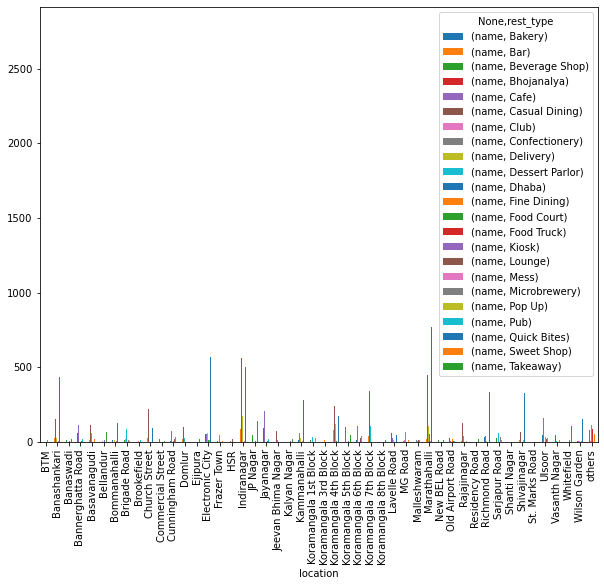

In [45]:
df3.plot(kind='bar', figsize= (10,8))

In [46]:
# location-wise rest_type facility
# we draw a pivot table

df4= df.groupby(['location', 'cuisines'])['name'].count()
df4.to_csv('location_cuisines.csv')
df4= pd.read_csv('location_cuisines.csv')
df4= pd.pivot_table(df4, values= None, index=['location'], columns= ['cuisines'], fill_value=0, aggfunc=np.sum)
df4.head()

name                                                    \
cuisines          Bakery Beverages Biryani Cafe Chinese Desserts Fast Food   
location                                                                     
BTM                   46        87     120   68      58       27       111   
Banashankari           8         2      17   15       0        9        18   
Banaswadi              8         4      22   20      11        4        21   
Bannerghatta Road     50         2      15   20      14       25        34   
Basavanagudi          15         5       8    8      12        8        27   

                                                                          \
cuisines          Finger Food Ice Cream Kerala North Indian South Indian   
location                                                                   
BTM                        25        34     47          328          113   
Banashankari                4         8      0           36           86   
Banaswadi                   4         4      8            8           37   
Bannerghatta Road           0         8      9           75           48   
Basavanagudi                6         2      0           21           89   

                                                  
cuisines          Street Food multicusine others  
location                                          
BTM                        23        3729    255  
Banashankari                7         664     30  
Banaswadi                   6         467     21  
Bannerghatta Road          20        1222     69  
Basavanagudi               15         451     17

<AxesSubplot:xlabel='location'>

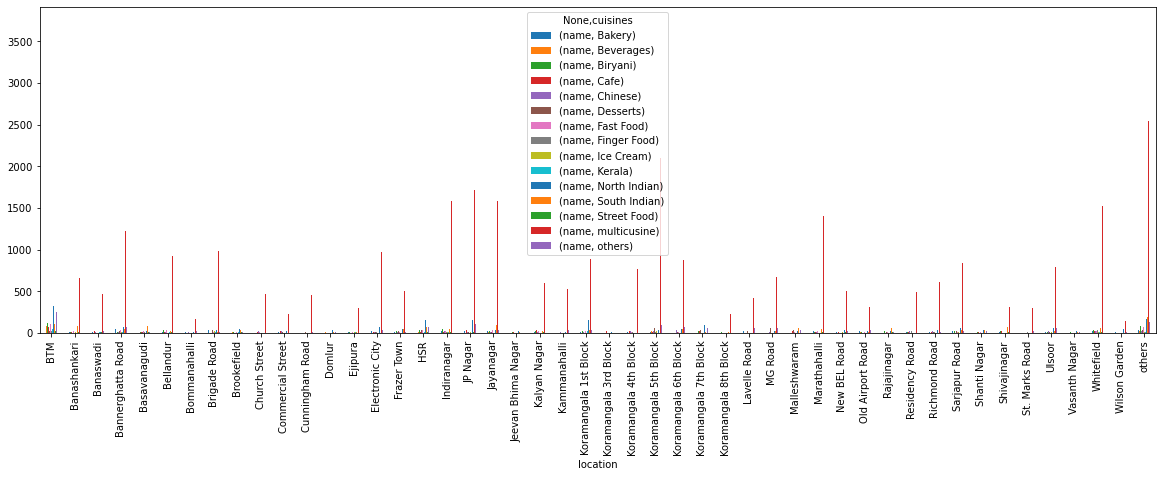

In [47]:
df4.plot(kind='bar', figsize= (20,6))

# Model preparation

In [48]:
# Based on all the factors rating prediction

In [49]:
df_model = df.copy()

In [50]:
df_model.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,reviews_list,menu_item,listed_in(type),city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,multicusine,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,multicusine,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,multicusine,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,multicusine,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,multicusine,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [51]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51148 non-null  object 
 1   name             51148 non-null  object 
 2   online_order     51148 non-null  object 
 3   book_table       51148 non-null  object 
 4   rate             51148 non-null  float64
 5   votes            51148 non-null  int64  
 6   location         51148 non-null  object 
 7   rest_type        51148 non-null  object 
 8   cuisines         51148 non-null  object 
 9   costfor2         51148 non-null  float64
 10  reviews_list     51148 non-null  object 
 11  menu_item        51148 non-null  object 
 12  listed_in(type)  51148 non-null  object 
 13  city             51148 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.9+ MB


In [52]:
X = df_model.drop(['rate'], axis=1)
X.head()

,address,name,online_order,book_table,votes,location,rest_type,cuisines,costfor2,reviews_list,menu_item,listed_in(type),city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,Banashankari,Casual Dining,multicusine,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,Banashankari,Casual Dining,multicusine,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,Banashankari,Cafe,multicusine,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,multicusine,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,Basavanagudi,Casual Dining,multicusine,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [53]:
X_categorical = (X.dtypes == 'O')
categorical_columns = X.columns[X_categorical].to_list()

In [54]:
categorical_columns

['address',
 'name',
 'online_order',
 'book_table',
 'location',
 'rest_type',
 'cuisines',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'city']

In [55]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [56]:
X[categorical_columns] = X[categorical_columns].apply(lambda x: lb.fit_transform(x))

In [57]:
X.head()

,address,name,online_order,book_table,votes,location,rest_type,cuisines,costfor2,reviews_list,menu_item,listed_in(type),city
0,7945,3664,1,1,775,1,5,13,800.0,10719,9062,0,1
1,3819,6968,1,0,787,1,5,13,800.0,12394,9062,0,1
2,778,6449,1,0,918,1,4,13,800.0,4581,9062,0,1
3,2498,198,0,0,88,1,20,13,300.0,9166,9062,0,1
4,336,2919,0,0,166,4,5,13,600.0,15346,9062,0,1


In [58]:
y = df.rate

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [61]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [10,20,50],
                'selection': ['random', 'cyclic'],
                'tol': [0.1, .01, .001]
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [10,20,50],
                'tol': [0.1, .01, .001]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=7)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.324192,{'normalize': True}
1,lasso,0.281407,"{'alpha': 10, 'selection': 'random', 'tol': 0.01}"
2,ridge,0.324193,"{'alpha': 10, 'tol': 0.1}"
3,decision_tree,0.867034,"{'criterion': 'mse', 'splitter': 'best'}"


In [89]:
from sklearn.ensemble import BaggingRegressor

In [90]:
Br = BaggingRegressor(n_estimators=200, random_state=50)

In [91]:
model_br=Br.fit(X_train,y_train)

In [92]:
y_pred=model_br.predict(X_test)

In [93]:
model_br.score(X_test,y_test)

0.9242811185422524

In [67]:
import xgboost as xg

C:\Users\arkarmak\AppData\Roaming\Python\Python38\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [68]:
model_xgb_r = xg.XGBRegressor(n_estimators = 10)

In [69]:
model_xgb_r.fit(X_train, y_train)

C:\Users\arkarmak\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
y_pred_xgb_r = model_xgb_r.predict(X_test)

C:\Users\arkarmak\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [72]:
model_xgb_r.score(X_test,y_test)

C:\Users\arkarmak\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.5574029548489171

# best model is BaggingRegressor i.e. model_br

In [94]:
import pickle
with open('Zomato_bangalore_restaurants_model_br.pickle','wb') as f:
    pickle.dump(model_br,f)

In [95]:
## Export location and column information to a json file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))